In [1]:
import pandas as pd

# Load datasets
apps_data = pd.read_csv('apps_data.csv')
reviews_data = pd.read_csv('reviews_data.csv')


In [2]:
# View the first few rows
print(apps_data.head())
print(reviews_data.head())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [3]:
# Check for missing values
print(apps_data.isnull().sum())
print(reviews_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [4]:
# Basic statistics
print(apps_data.describe())
print(reviews_data.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
       Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000


In [5]:
# Drop rows with missing values
apps_data.dropna(inplace=True)
reviews_data.dropna(inplace=True)

# Remove duplicates
apps_data.drop_duplicates(inplace=True)

In [6]:
# Check cleaned data
print(apps_data.head())
print(apps_data.info())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [7]:
# Handle missing values
apps_data.dropna(subset=['Rating'], inplace=True)  # Drop rows with missing ratings

# Convert Size to numeric (in MB)
apps_data['Size'] = apps_data['Size'].str.replace('M', '').str.replace('k', '').replace('Varies with device', '0')
apps_data['Size'] = apps_data['Size'].astype(float)

# Convert Installs to numeric
apps_data['Installs'] = apps_data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Check cleaned data
print(apps_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   float64
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 971.9+ KB
None


In [8]:
# Drop rows with missing or NaN values in Sentiment columns
reviews_data.dropna(subset=['Sentiment_Polarity'], inplace=True)

# Check cleaned data
print(reviews_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB
None


In [9]:
# Merge apps data with reviews data on the "App" column
merged_data = pd.merge(apps_data, reviews_data, on='App', how='left')

# Check merged dataset
print(merged_data.head())


                                              App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   
2                             Coloring book moana  ART_AND_DESIGN     3.9   
3                             Coloring book moana  ART_AND_DESIGN     3.9   
4                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews  Size  Installs  Type Price Content Rating  \
0     159  19.0     10000  Free     0       Everyone   
1     967  14.0    500000  Free     0       Everyone   
2     967  14.0    500000  Free     0       Everyone   
3     967  14.0    500000  Free     0       Everyone   
4     967  14.0    500000  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  \
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play  January 15, 2018  

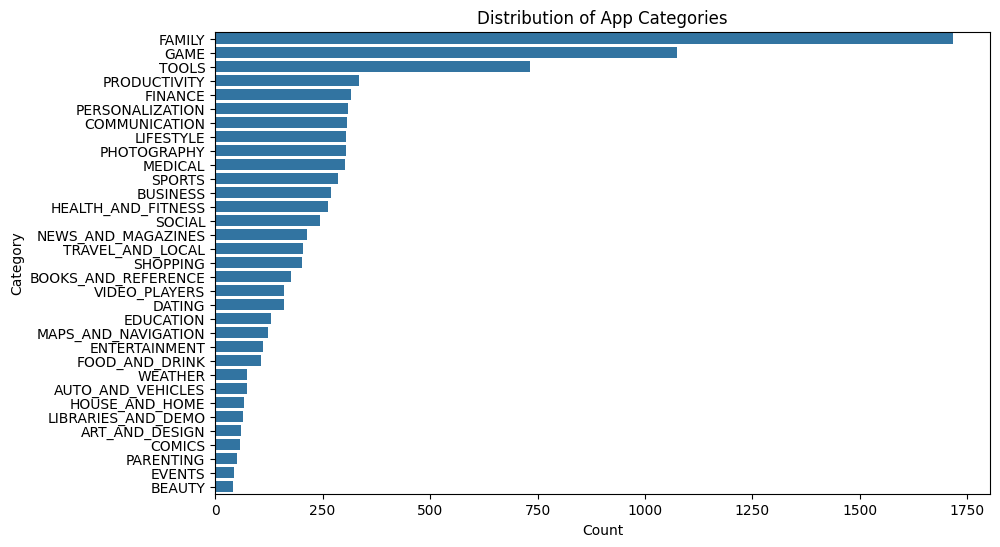

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=apps_data, order=apps_data['Category'].value_counts().index)
plt.title('Distribution of App Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


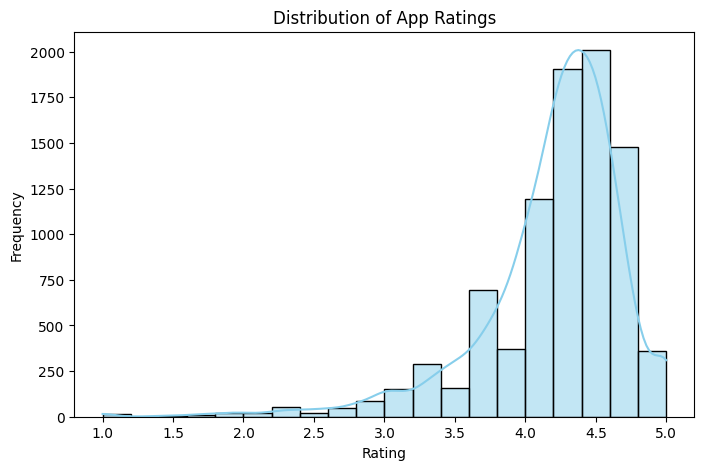

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(apps_data['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


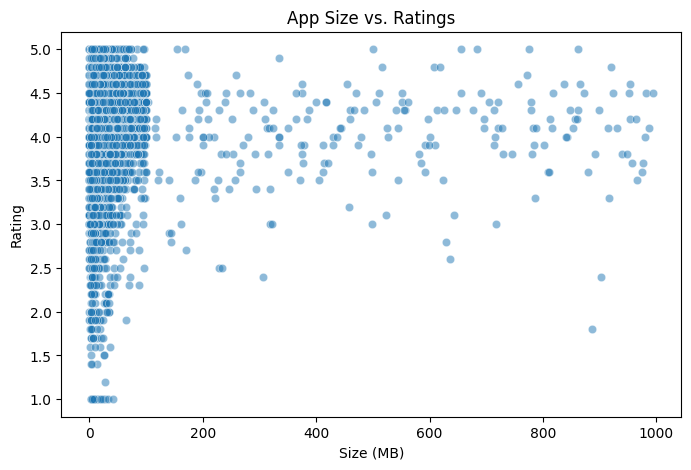

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Size', y='Rating', data=apps_data, alpha=0.5)
plt.title('App Size vs. Ratings')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()


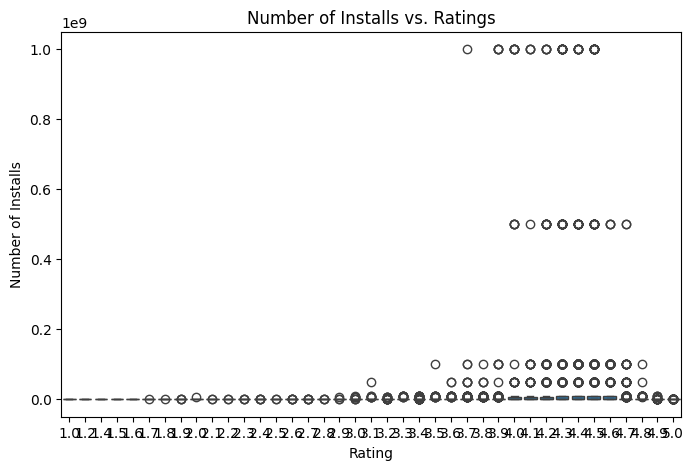

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Rating', y='Installs', data=apps_data)
plt.title('Number of Installs vs. Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.show()


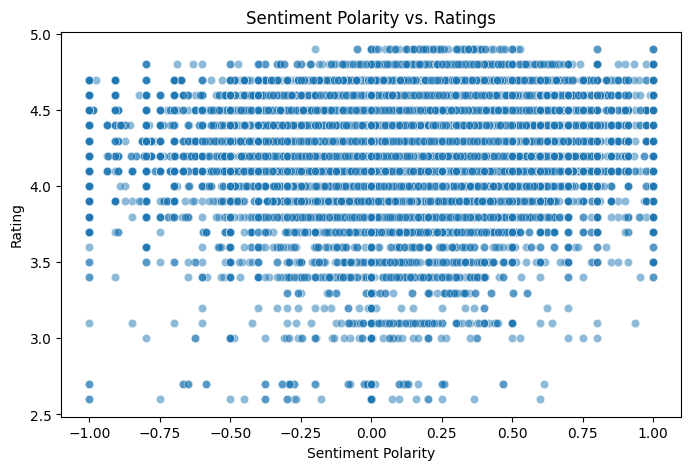

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sentiment_Polarity', y='Rating', data=merged_data, alpha=0.5)
plt.title('Sentiment Polarity vs. Ratings')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Rating')
plt.show()


In [15]:
# Calculate correlation
correlation = merged_data['Sentiment_Polarity'].corr(merged_data['Rating'])
print(f"Correlation between Sentiment Polarity and Ratings: {correlation}")


Correlation between Sentiment Polarity and Ratings: 0.046445404101646014
